In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('default')

In [2]:
print('loading dataset...')
data = pd.read_csv('/Volumes/Diedrichsen_data$/data/Chord_exp/ExtFlexChord/EFC1/analysis/efc1_chord.tsv', sep='\t')
data['chordID'] = data['chordID'].astype(str)
data[['MD', 'RT', 'ET']] = data[['MD', 'RT', 'ET']].astype(float)

loading dataset...


In [3]:
chordID = ['21911', '92122', '91211', '22911', '21291', '12129', '12291', '11911']

data1 = data[(data['sess'] == 1) & (data['num_fingers'] == 4)]
data1_avg = data1.groupby(['chordID'])[['accuracy','MD', 'RT', 'ET']].mean(numeric_only=True).reset_index()
data1_avg_sorted_MD = data1_avg.sort_values(by='MD').reset_index()
data1_avg_sorted_Succ = data1_avg.sort_values(by='accuracy').reset_index()

Text(0.5, 1.0, 'Sorted success rate (day 1)')

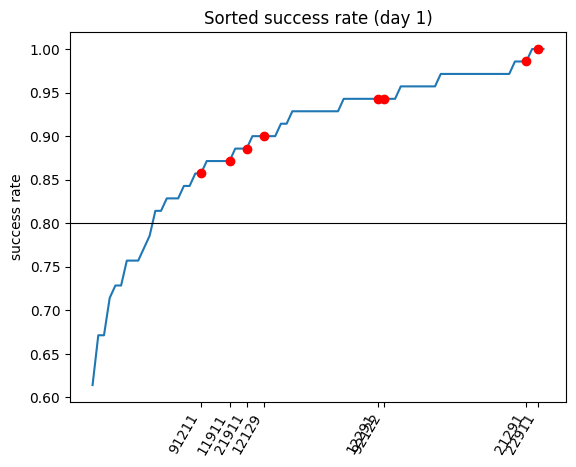

In [16]:
fig, axs = plt.subplots()

skip = 5

sel_idx = data1_avg_sorted_Succ['chordID'].isin(chordID)

axs.plot(data1_avg_sorted_Succ['chordID'], data1_avg_sorted_Succ['accuracy'])
axs.scatter(data1_avg_sorted_Succ[sel_idx]['chordID'], data1_avg_sorted_Succ[sel_idx]['accuracy'], color='red', zorder=1000)

axs.axhline(.8, color='k', lw=.8)

axs.set_xticks(data1_avg_sorted_Succ['index'][sel_idx].index)
axs.set_xticklabels(data1_avg_sorted_Succ['chordID'][sel_idx], rotation=60, ha='right')

axs.set_ylabel('success rate')
axs.set_title('Sorted success rate (day 1)')

Text(0.5, 1.0, 'Sorted mean deviation (day 1)')

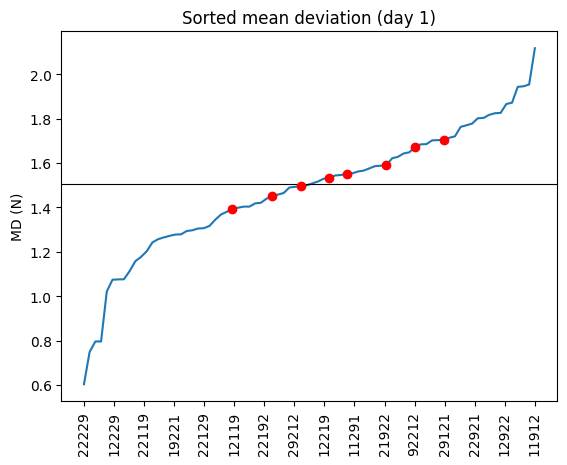

In [17]:
fig, axs = plt.subplots()

skip = 5

sel_idx = data1_avg_sorted_MD['chordID'].isin(chordID)

median_MD = data1_avg['MD'].median()

axs.plot(data1_avg_sorted_MD['chordID'], data1_avg_sorted_MD['MD'])
axs.scatter(data1_avg_sorted_MD[sel_idx]['chordID'], data1_avg_sorted_MD[sel_idx]['MD'], color='red', zorder=1000)

axs.axhline(median_MD, color='k', lw=.8)

axs.set_xticks(np.linspace(0, len(data1_avg_sorted_MD)-1, int(len(data1_avg_sorted_MD) / skip)))
axs.set_xticklabels(data1_avg_sorted_MD['chordID'][::skip], rotation=90)

axs.set_ylabel('MD (N)')
axs.set_title('Sorted mean deviation (day 1)')

Text(0, 0.5, 'MD (N)')

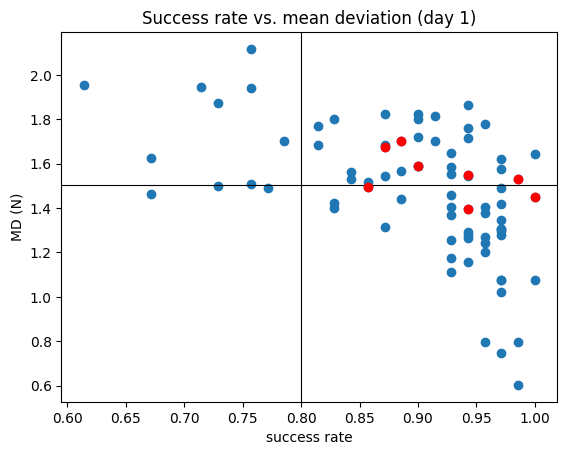

In [13]:
fig, axs = plt.subplots()

sel_idx = data1_avg['chordID'].isin(chordID)

median_MD = data1_avg['MD'].median()

axs.scatter(data1_avg['accuracy'], data1_avg['MD'])
axs.scatter(data1_avg[sel_idx]['accuracy'], data1_avg[sel_idx]['MD'], color='red', zorder=1000)

axs.axhline(median_MD, color='k', lw=.8)
axs.axvline(.8, color='k', lw=.8)

axs.set_title('Success rate vs. mean deviation (day 1)')
axs.set_xlabel('success rate')
axs.set_ylabel('MD (N)')